### Neuron Model
**The microcircuits of striatum in silico**

### Network List

- SPN (done)
- FS (in-progress)


In [1]:
pip install neuron

Note: you may need to restart the kernel to use updated packages.


In [1]:
### Library
from brian2 import *
import brian2 as br
from brian2tools import *
import matplotlib.pyplot as pltㅋ
import random
import numpy as np
from brian2.units import *
from neuron import h, gui
from brian2 import ms, mV, pA, pF, siemens, amp, second, NeuronGroup, defaultclock, run
import json
import numpy as np

pS = siemens * 1e-12

--No graphics will be displayed.


### Model 1: Quadratic Integrate and Fire (SPN)

- construct dSPN, iSPN
- V: membrane potential 
- u: neuron's slow current
- I<sub>spon</sub>: 뉴런 내부의 활동 반영 (represents the intrinsic spontaneous current with the neuron)
- I<sub>stim</sub>: externally applied stimulus current, which in this context would include the cortical input
- I<sub>syn</sub>: This current arises from synaptic inputs received by the neuron from other neurons within the network (include GABAergic inputs, Glutamatergic inputs)

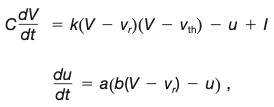

In [2]:
### SPN Neuron Model 
# D1(SD1) - dSPN, D2 - iSPN

def Neuron_dSPN():

    eqs = '''
    dv/dt = (K*1*pF/ms/mV*(v-VR)*(v-vt)-u*pF+I)/C + sigma_msn*xi/ms**.5 : volt
    du/dt = a*(b*(v-VR)-u) : volt/second
    VR = vr*(1+KAPA*Dop1) : volt
    K = k*(1-ALPHA*Dop2) : 1
    a       : 1/second
    b       : 1/second
    c       : volt
    d       : volt/second
    k       : 1
    vr      : volt
    vt      : volt
    vpeak   : volt
    I = Ispon + Istim + Isyn : amp
    Istim   : amp
    Ispon   : amp
    Isyn : amp
    Dop1      : 1
    Dop2      : 1
    '''

    dSPN = NeuronGroup(N, model=eqs,
                       threshold='v > vpeak',
                       reset='v = c; u += d',
                       method='euler')
    E_L = -74.2 * br.mV
    dSPN.v = E_L 

    ##dSPN.g_ex = 0 * br.siemens
    #dSPN.g_in = 0 * br.siemens
    #dSPN.w = 0 * br.amp
    #dSPN.ex_input = 0 * br.second
    #dSPN.in_input = 0 * br.second
    return dSPN

In [3]:
def Neuron_iSPN():
    eqs = '''
    dv/dt = (K*1*pF/ms/mV*(v-VR)*(v-vt)-u*pF+I)/C : volt
    du/dt = a*(b*(v-VR)-u) : volt/second
    VR = vr*(1+KAPA*Dop2) : volt
    K = k*(1-ALPHA*Dop1) : 1
    a       : 1/second
    b       : 1/second
    c       : volt
    d       : volt/second
    k       : 1
    vr      : volt
    vt      : volt
    vpeak   : volt
    I = Ispon + Istim + Isyn : amp
    Istim   : amp
    Ispon   : amp
    Isyn    : amp
    Dop1    : 1
    Dop2    : 1
    '''
# not consider sigma_msn

    iSPN = NeuronGroup(N, model=eqs,
                       threshold='v > vpeak',
                       reset='v = c; u += d',
                       method='euler')
    E_L = -74.2 * mV
    iSPN.v = E_L 

    return iSPN

In [4]:
# Neuron parameters 
# Fountas, Zafeirios. "Action selection in the rhythmic brain: The role of the basal ganglia and tremor." PhD Thesis, Imperial College London (2016).

a = 0.01 / br.ms
b = -20 / br.ms
c = -55 * br.mV
d = 91 * br.mV / br.ms
vpeak = 4. * br.mV
vr = -80 * mV
vt = -29.7 * br.mV
C = 15.2 * br.pF 
v = -80 * br.mV
u = 0.0 * br.mV
Ispon = 0.0 * br.mV
K = 0.0289
L = 0.331

KAPA = 0.0289   # Humphries etal 2009a
ALPHA = 0.032   # Humphries etal 2009a
HTA = 0.1       # Humphries 2014
EPSILON = 0.625 # Humphries 2014
BITA1 = 0.5     # Humphries 2014
BITA2 = 0.3     # Humphries 2014
        
sigma_msn = 14.0 * br.mV
N = 10000

INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var/folders
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var/folders/tj
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T
INFO:root:creating /var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1/var/folders/tj/9vhjqp2n63ng9609fgfkf_dc0000gn/T/brian_flag_test_mjcpr9n1
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch arm64 -fPIC -O2 -isystem /opt/anaconda3/envs/brain/include -arch

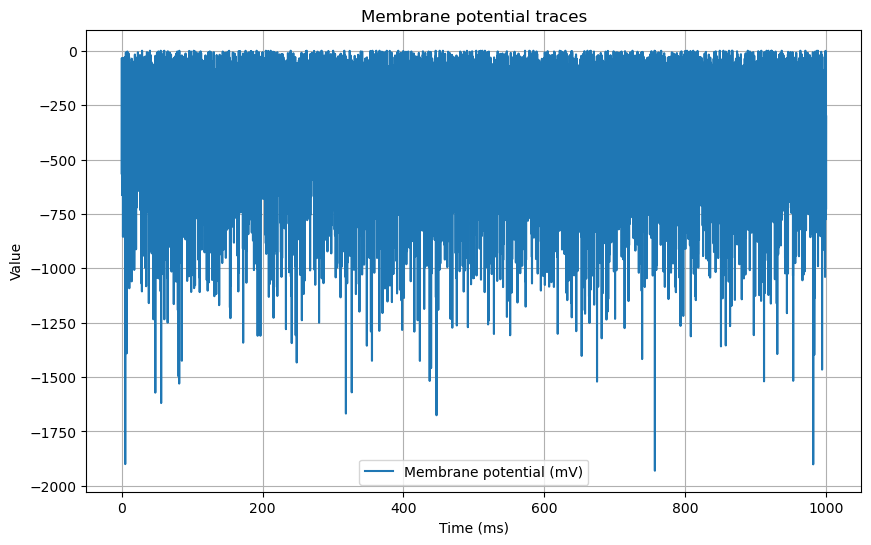

In [5]:
### Simulation 

dSPN_group = Neuron_dSPN()

# Run the simulation
simulation_time = 1000 * ms
defaultclock.dt = 0.1 * ms  # Set the integration time step
run(simulation_time)

# Extract membrane potential traces
v = dSPN_group.v / mV

# Generate the time array
t = np.arange(0, simulation_time / ms, defaultclock.dt / ms)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, v, label='Membrane potential (mV)')
plt.xlabel('Time (ms)')
plt.ylabel('Value')
plt.title('Membrane potential traces')
plt.legend()
plt.grid(True)
plt.show()

### Model 2: Quadratic Integrate and Fire (FS)

In [6]:
# parameters

sigma_fsi = 4.6*mV 

a = 0.2 / br.ms
b = -0.025 / br.ms
c = -60 / br.mV
d = 0.0 * br.mV / br.ms
vpeak = 25 * br.mV
vr = -70 * mV
vt = -50 * br.mV
C = 80.0 * br.pF 
v = -70 * br.mV
u = 0.0 * br.mV
Ispon = 0.0 * br.mV
k = 1.0
L = 0.331
vb = -55.0 * br.mV
hta = 0.1
epsilon = 0.625 * br.mV

KAPA = 0.0289   # Humphries etal 2009a
ALPHA = 0.032   # Humphries etal 2009a
HTA = 0.1       # Humphries 2014
EPSILON = 0.625 # Humphries 2014
BITA1 = 0.5     # Humphries 2014
BITA2 = 0.3     # Humphries 2014

In [7]:
def Neuron_FS(N):

    eqs = '''
    dv/dt = (K*1*pF/ms/mV*(v-VR)*(v-vt)-u*pF+I)/C + sigma_msn*xi/ms**.5 : volt
    du/dt = a*(b*(v-VR)-u) : volt/second
    VR = vr*(1+KAPA*Dop1) : volt
    K = k*(1-ALPHA*Dop2) : 1
    a       : 1/second
    b       : 1/second
    c       : volt
    d       : volt/second
    k       : 1
    vr      : volt
    vt      : volt
    C       : pF
    vpeak   : volt
    I = Ispon + Istim + Isyn : amp
    Istim   : amp
    Ispon   : amp
    Isyn = Igaba_MSN + Igaba_FSI + Iampa*(1.0 - BITA2*Dop2) + Inmda*(1.0 + BITA1*Dop1): amp
    Dop1      : 1
    Dop2      : 1
    '''
# not consider sigma_msn

    FS = NeuronGroup(N, model=eqs,
                       threshold='v > vpeak',
                       reset='v = c; u += d',
                       method='euler')
    E_L = -74.2 * mV
    FS.v = E_L 
    
    return FS

### Connect Synapse

In [8]:
### Load synaptic parameter
data = dict()
data["MSN"] = dict()
data["MSN"]["tau"] = {
    "AMPA" :   { "value" : 6 * ms, "unit" : "ms"},
    "NMDA" :   { "value" : 160 * ms, "unit" : "ms"},
    "GABA" :   { "value" : 4 * ms, "unit" : "ms"}
}
data["MSN"]["E"] = {
    "AMPA" :   { "value" : 0 * mV, "unit" : "mV"},
    "NMDA" :   { "value" : 0 * mV, "unit" : "mV"},
    "GABA" :   { "value" : -60 * mV, "unit" : "mV"},
}
data["MSN"]["G"] = {
    "Ctx-MSN" : {
        "AMPA":   { "value" : 0.6, "unit" : "nS"},
        "NMDA":   { "value" : 0.3, "unit" : "nS"},
        "GABA":   { "value" : 0.0, "unit" : "nS"},
    },
    "MSN-MSN" : {
        "AMPA":   { "value" : 0.0, "unit" : "nS"},
        "NMDA":   { "value" : 0.0, "unit" : "nS"},
        "GABA":   { "value" : 0.75, "unit" : "nS"},
    },
    "FSI-MSN" : {
        "AMPA":   { "value" : 0.0, "unit" : "nS"},
        "NMDA":   { "value" : 0.0, "unit" : "nS"},
        "GABA":   { "value" : 3.75, "unit" : "nS"},
    }
}

N = 10000
tau_ampa = 6 * ms / 1000
tau_nmda = 160 * ms / 1000
tau_gaba = 4 * ms / 1000
theta_syn = -50 * mV
E_syn = -80 * mV

In [9]:
# load parameter value & model

connect_probability = {
    'pSP1SP1': 0.26,
    'pSP1SP2': 0.06,
    'pSP2SP1': 0.28,
    'pSP2SP2': 0.36,
    'pFSFS': 0.58,      
}

# respectively distance 100um 
connect_probability_100 = {
    'pSP1SP1': 0.07,
    'pSP1SP2': 0.04,
    'pSP2SP1': 0.23,
    'pSP2SP2': 0.13,
    'pFSFS': 0.58,
    'pFSSP1': 0.89,
    'pFSSP2': 0.67      
}

# 함수 저장
model_functions = {
    'Neuron_dSPN': Neuron_dSPN,
    'Neuron_iSPN': Neuron_iSPN,
    'Neuron_FS': Neuron_FS
}

In [10]:
### Synapse Connection
# Hjorth, JJ Johannes, et al. "The microcircuits of striatum in silico." Proceedings of the National Academy of Sciences 117.17 (2020): 9554-9565.

def connect(source, target, model, p_connect=0.1, pre = ''):
    synapse = Synapses(source, target, model=model, pre = pre)
    synapse.connect(p=p_connect)
    return synapse

dSPN = model_functions['Neuron_dSPN']()
iSPN = model_functions['Neuron_iSPN']()

syn_eqs_SPN = '''
    B = 1.0/(1.0+(0.28)*exp(-0.062*v/mV)) : 1

    Iampa     = G_ampa*g_ampa*(E_ampa-v): amp
    Inmda     = B*G_nmda*g_nmda*(E_nmda-v) : amp
    Igaba_MSN = G_gaba_MSN*g_gaba_MSN*(E_gaba-v) : amp
    Igaba_FSI = G_gaba_FSI*g_gaba_FSI*(E_gaba-v) : amp

    dg_ampa/dt = -g_ampa/tau_ampa : siemens
    dg_nmda/dt = -g_nmda/tau_nmda : siemens
    dg_gaba_MSN/dt = -g_gaba_MSN/tau_gaba : siemens
    dg_gaba_FSI/dt = -g_gaba_FSI/tau_gaba : siemens
    tau_ampa   : second
    tau_nmda   : second
    tau_gaba   : second
    E_ampa     : volt
    E_nmda     : volt
    E_gaba     : volt
    G_ampa     : 1
    G_nmda     : 1
    G_gaba_MSN : 1
    G_gaba_FSI : 1
    '''

syn_eqs_FS = '''
    B = 1.0/(1.0+(0.28)*exp(-0.062*v/mV)) : 1

    Iampa     = G_ampa*g_ampa*(E_ampa-v): amp
    Inmda     = B*G_nmda*g_nmda*(E_nmda-v) : amp
    Igaba_MSN = G_gaba_MSN*g_gaba_MSN*(E_gaba-v) : amp
    Igaba_FSI = G_gaba_FSI*g_gaba_FSI*(E_gaba-v) : amp

    dg_ampa/dt = -g_ampa/tau_ampa : siemens
    dg_nmda/dt = -g_nmda/tau_nmda : siemens
    dg_gaba_MSN/dt = -g_gaba_MSN/tau_gaba : siemens
    dg_gaba_FSI/dt = -g_gaba_FSI/tau_gaba : siemens

    tau_ampa   : second
    tau_nmda   : second
    tau_gaba   : second
    E_ampa     : volt
    E_nmda     : volt
    E_gaba     : volt
    G_ampa     : 1
    G_nmda     : 1
    G_gaba_MSN : 1
    G_gaba_FSI : 1
    '''

syn_dSPN_dSPN = connect(dSPN, dSPN, syn_eqs_SPN, p_connect = connect_probability.get('pSP1SP1'), pre = "g_gaba_MSN+=0.4*nS")
syn_dSPN_iSPN = connect(dSPN, iSPN, syn_eqs_SPN, p_connect = connect_probability.get('pSP1SP2'), pre = "g_gaba_MSN+=1.0*nS")
syn_iSPN_dSPN = connect(iSPN, dSPN, syn_eqs_SPN, p_connect = connect_probability.get('pSP2SP1'), pre = "g_gaba_MSN+=1.2*nS")
syn_iSPN_iSPN = connect(iSPN, iSPN, syn_eqs_SPN, p_connect = connect_probability.get('pSP2SP2'), pre = "g_gaba_MSN+=1.0*nS")

WARNING    The 'pre' keyword is deprecated, use 'on_pre' instead. [brian2.synapses.synapses.deprecated_pre]


INFO       The synaptic equation for the variable g_ampa does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]
INFO       The synaptic equation for the variable g_gaba_FSI does not specify whether it should be integrated at every timestep ('clock-driven') or only at spiking events ('event-driven'). It will be integrated at every timestep which can slow down your simulation unnecessarily if you only need the values of this variable whenever a spike occurs. Specify the equation as clock-driven explicitly to avoid this warning. [brian2.synapses.synapses.clock_driven]
INFO       The synaptic equation for the variable g_gaba_MSN does not specify whethe

In [11]:
### Generate Synapse 

synapse_functions = {
    'syn_dSPN_dSPN': syn_dSPN_dSPN,
    'syn_iSPN_dSPN': syn_iSPN_dSPN,
    'syn_dSPN_iSPN': syn_dSPN_iSPN,
    'syn_iSPN_iSPN': syn_iSPN_iSPN
}

### Simulation 

In [12]:
def simulation(neuron_models, synapse_models, duration=1000*ms, dt=0.1*ms):
  """
  다양한 뉴런 모델과 시냅스 모델을 사용하여 시뮬레이션을 수행하는 함수입니다.

  Args:
    neuron_models: 시뮬레이션에 사용할 뉴런 모델 목록입니다.
    synapse_models: 시뮬레이션에 사용할 시냅스 모델 목록입니다.
    duration: 시뮬레이션 지속 시간 (ms)입니다.
    dt: 시뮬레이션 시간 간격 (ms)입니다.

  Returns:
    spike history
  """

  # 네트워크 구성
  network = Network()

  # 뉴런 그룹 생성
  for model in neuron_models:
    network.add(model)

  # 시냅스 연결
  for source, target, synapse_model in synapse_models:
    synapse_model.connect()

  # 스파이크 모니터링
  spike_monitors = []
  for model in neuron_models:
    spike_monitor = SpikeMonitor(model)
    spike_monitors.append(spike_monitor)
    network.add(spike_monitor)

  # 시뮬레이션 실행
  network.run(duration)

  # 스파이크 기록 추출
  spike_records = []
  spike_records = [monitor.t for monitor in spike_monitors]

  return spike_records

In [13]:
synapse_models = [
  (dSPN, dSPN, syn_dSPN_dSPN),
  (dSPN, iSPN, syn_dSPN_iSPN),
  (iSPN, dSPN, syn_iSPN_dSPN),
  (iSPN, iSPN, syn_iSPN_iSPN)
]

In [14]:
start_scope()
spike_records = simulation([dSPN, iSPN], synapse_models, duration=1000*ms)

WARNING    'Ispon' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 0. * volt. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'a' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 200. * hertz. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'b' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value -25. * hertz. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'k' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value 1.0. The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]
WARNING    'u' is an internal variable of group 'neurongroup_1', but also exists in the run namespace with the value

### Visualization

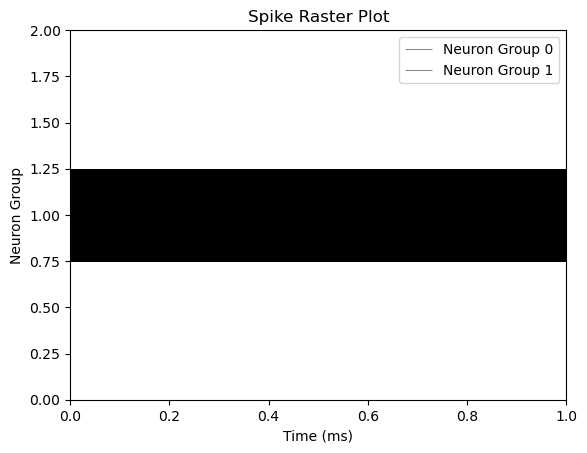

In [17]:
def visualize_spikes(spike_records, duration):
  """
  시뮬레이션 결과의 스파이크 기록을 시각화합니다.

  Args:
    spike_records: 각 뉴런 그룹의 스파이크 기록입니다.
    duration: 시뮬레이션 지속 시간 (ms)입니다.
  """

  # 각 뉴런 그룹의 스파이크 기록을 추출합니다.
  spike_times = [[float(spike_time) for spike_time in group_records] for group_records in spike_records]

  # 라스터 플롯 생성
  for i, spike_time in enumerate(spike_times):
    plt.eventplot(spike_time, linelengths=0.5, linewidths=0.5, color='k', alpha=0.7,
                  label=f'Neuron Group {i}')

  # 라벨과 제목 설정
  plt.xlabel('Time (ms)')
  plt.ylabel('Neuron Group')
  plt.title('Spike Raster Plot')

  # 축 설정
  plt.xlim(0, duration)
  plt.ylim(0, len(spike_records))

  # 범례 표시
  plt.legend()

  # 그래프 표시
  plt.show()


# 스파이크 기록 시각화
visualize_spikes(spike_records, 1000 * ms)

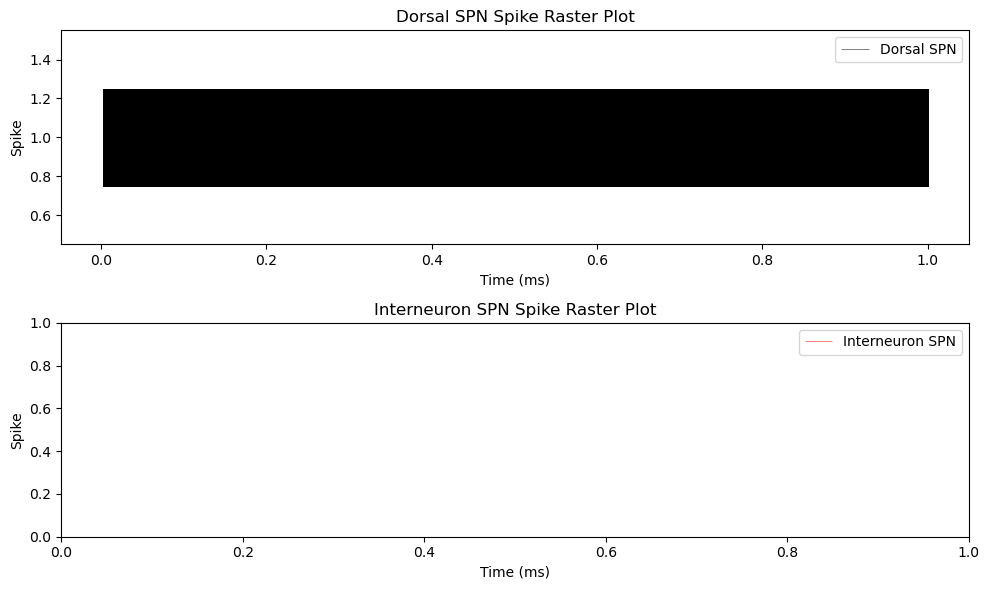

In [18]:
dSPN_spikes = spike_records[0]
iSPN_spikes = spike_records[1]

# Visualize spikes for each neuron group
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.eventplot(dSPN_spikes, linelengths=0.5, linewidths=0.5, color='k', alpha=0.7,
             label='Dorsal SPN')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.title('Dorsal SPN Spike Raster Plot')
plt.legend()

plt.subplot(2, 1, 2)
plt.eventplot(iSPN_spikes, linelengths=0.5, linewidths=0.5, color='r', alpha=0.7,
             label='Interneuron SPN')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.title('Interneuron SPN Spike Raster Plot')
plt.legend()

plt.tight_layout()
plt.show()

### Cortex Input

In [19]:
def Neuron_dSPN_ctx():

    eqs = '''
    dv/dt = (K*1*pF/ms/mV*(v-VR)*(v-vt)-u*pF+I)/C + sigma_msn*xi/ms**.5 : volt
    du/dt = a*(b*(v-VR)-u) : volt/second
    VR = vr*(1+KAPA*Dop1) : volt
    K = k*(1-ALPHA*Dop2) : 1
    a       : 1/second
    b       : 1/second
    c       : volt
    d       : volt/second
    k       : 1
    vr      : volt
    vt      : volt
    vpeak   : volt
    I = Ispon + Istim + Isyn : amp
    Istim   : amp
    Ispon   : amp
    Isyn : amp
    Dop1      : 1
    Dop2      : 1
    '''

    dSPN = NeuronGroup(N, model=eqs,
                       threshold='v > vpeak',
                       reset='v = c; u += d',
                       method='euler')
    E_L = -74.2 * br.mV
    dSPN.v = E_L 
    dSPN.run_regularly('Istim = input_array(t)', dt=dt*ms)

    ##dSPN.g_ex = 0 * br.siemens
    #dSPN.g_in = 0 * br.siemens
    #dSPN.w = 0 * br.amp
    #dSPN.ex_input = 0 * br.second
    #dSPN.in_input = 0 * br.second
    return dSPN

In [20]:
def Neuron_iSPN_ctx():
    eqs = '''
    dv/dt = (K*1*pF/ms/mV*(v-VR)*(v-vt)-u*pF+I)/C : volt
    du/dt = a*(b*(v-VR)-u) : volt/second
    VR = vr*(1+KAPA*Dop2) : volt
    K = k*(1-ALPHA*Dop1) : 1
    a       : 1/second
    b       : 1/second
    c       : volt
    d       : volt/second
    k       : 1
    vr      : volt
    vt      : volt
    vpeak   : volt
    I = Ispon + Istim + Isyn : amp
    Istim   : amp
    Ispon   : amp
    Isyn    : amp
    Dop1    : 1
    Dop2    : 1
    '''
# not consider sigma_msn

    iSPN = NeuronGroup(N, model=eqs,
                       threshold='v > vpeak',
                       reset='v = c; u += d',
                       method='euler')
    E_L = -74.2 * mV
    iSPN.v = E_L 
    iSPN.run_regularly('Istim = input_array(t)', dt=dt*ms)

    return iSPN

In [23]:
def generate_cortex_input(duration, dt):
    t = np.arange(0, duration, dt)  # 시간 배열 생성
    input_values = np.ones_like(t) * 20  # 기본 값으로 초기화
    
    spike_time = 50 
    spike_duration = 20
    spike_value = 90

    spike_indices = np.logical_or(t >= spike_time, t < spike_time + spike_duration)
    for i in range(min(spike_time, len(input_values)), min(spike_time + spike_duration, len(input_values))):
        input_values[i] = spike_value
    input_values = input_values * 1e-9  # Convert to amps
        
    return t * ms, input_values * nA

# Generate cortex input values
duration = 10000  # total duration in ms
dt = 1          # time step in ms

time_array, cortex_input = generate_cortex_input(duration, dt)

# Create a TimedArray with the cortex input, ensuring dt has units of seconds
input_array = TimedArray(cortex_input, dt=dt*ms)

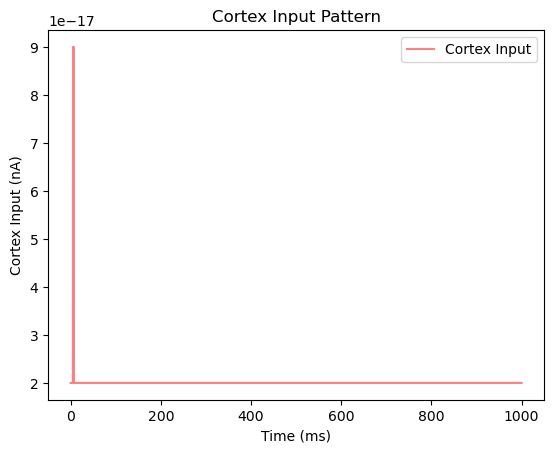

In [24]:
# Cortex 입력 패턴 시각화
plt.plot(t, cortex_input, 'r', alpha=0.5, label='Cortex Input')
plt.xlabel('Time (ms)')
plt.ylabel('Cortex Input (nA)')
plt.title('Cortex Input Pattern')
plt.legend()

In [25]:
# 함수 저장
model_functions_ctx = {
    'Neuron_dSPN_ctx': Neuron_dSPN_ctx,
    'Neuron_iSPN_ctx': Neuron_iSPN_ctx,
}

In [26]:
dSPN_ctx = model_functions_ctx['Neuron_dSPN_ctx']()
iSPN_ctx = model_functions_ctx['Neuron_iSPN_ctx']()

In [33]:
def simulation_ctx(neuron_models, synapse_models, cortex_input_array, duration=1000*ms, dt=0.1*ms):

    # 네트워크 구성
    network = Network()

  # 뉴런 그룹 생성
    for model in neuron_models:
        network.add(model)

  # 시냅스 연결
    for source, target, synapse_model in synapse_models:
        synapse_model.connect()

    cortex_input = TimedArray(Quantity(cortex_input_array), dt=dt * ms)
    for neuron_group in neuron_models:
        neuron_group.Istim = cortex_input

    # 스파이크 모니터링
    spike_monitors = []
    for model in neuron_models:
        spike_monitor = SpikeMonitor(model)
        spike_monitors.append(spike_monitor)
        network.add(spike_monitor)

    # 시뮬레이션 실행
    network.run(duration)

    # 스파이크 기록 추출
    spike_records = []
    spike_records = [monitor.t for monitor in spike_monitors]

    return spike_records

In [34]:
spike_records = simulation_ctx([dSPN_ctx, iSPN_ctx], synapse_models, cortex_input,
                          duration=duration * ms, dt=dt)

: 

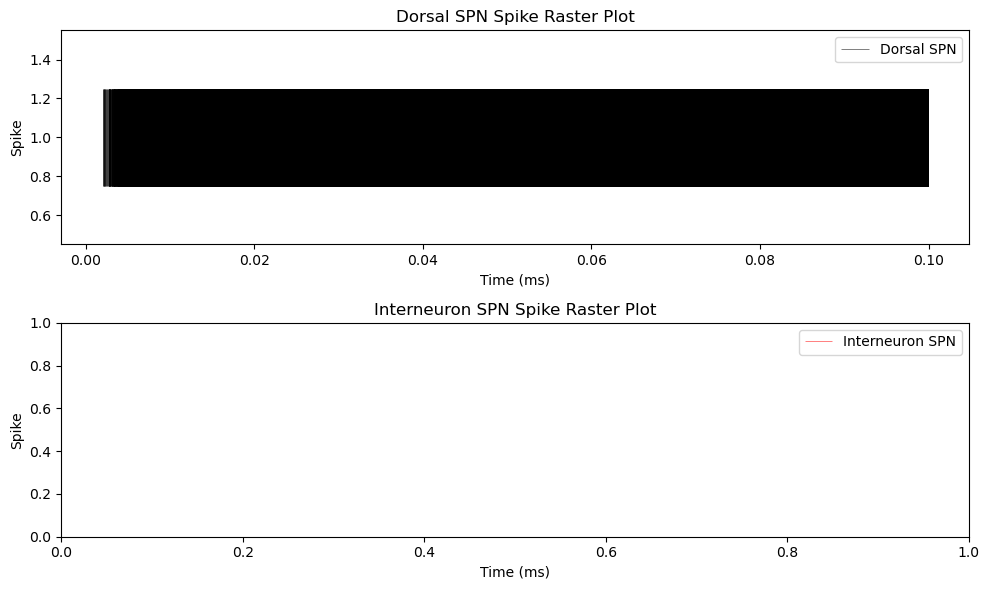

In [39]:
dSPN_spikes = spike_records[0]
iSPN_spikes = spike_records[1]

# Visualize spikes for each neuron group
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.eventplot(dSPN_spikes, linelengths=0.5, linewidths=0.5, color='k', alpha=0.7,
             label='Dorsal SPN')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.title('Dorsal SPN Spike Raster Plot')
plt.legend()

plt.subplot(2, 1, 2)
plt.eventplot(iSPN_spikes, linelengths=0.5, linewidths=0.5, color='r', alpha=0.7,
             label='Interneuron SPN')
plt.xlabel('Time (ms)')
plt.ylabel('Spike')
plt.title('Interneuron SPN Spike Raster Plot')
plt.legend()

plt.tight_layout()
plt.show()